In [19]:
import keras
from keras import layers, Model
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

def preprocess(imgs):
    imgs = imgs.astype("float32") / 255.0
    imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2)), constant_values=0.0)
    imgs = np.expand_dims(imgs, -1)
    return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

encoder_input_layer = layers.Input(shape=x_train.shape[1:], name="input layer")
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(encoder_input_layer)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = x.shape[1:]
print(shape_before_flattening)
x = layers.Flatten()(x)
encoder_output_layer = layers.Dense(2, name="encoder_output")(x)
encoder = Model(encoder_input_layer, encoder_output_layer)

encoder.summary()

(4, 4, 128)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_output (Dense)          │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 96,770 (378.01 KB)

 Trainable params: 96,770 (378.01 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
decoder_input_layer = layers.Input(shape=(2, ), name="decoder input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input_layer)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(128, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
decoder_ouput_layer = layers.Conv2D(1, (3, 3), strides=1, activation="sigmoid", padding="same", name="decoder_output_layer")(x)

decoder = Model(decoder_input_layer, decoder_ouput_layer)

decoder.summary()

In [22]:
autoencoder = Model(encoder_input_layer, decoder(encoder_output_layer))
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(x_train, x_train, epochs=20, batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 0.3567
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - loss: 0.2583
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 0.2557
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 0.2533
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - loss: 0.2518
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 0.2498
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - loss: 0.2488
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 0.2483
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - loss: 0.2471
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - loss: 0.2466
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.2460
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - loss: 0.2457
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - loss: 0.2450
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - loss: 0.2449
Epoch 15/20
600/600 ━━━━━━━━━

In [26]:
from matplotlib.pylab import plt
predictions = autoencoder.predict(x_test)
print(predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
(10000, 32, 32, 1)


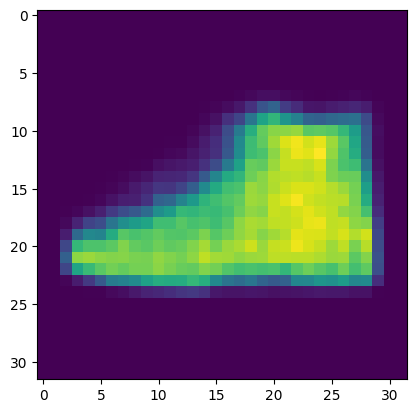

In [27]:
plt.imshow(predictions[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 1.8108983   0.650728  ]
 [-2.7553182   2.4110317 ]
 [-5.0624433  -5.6880126 ]
 ...
 [-1.3977469  -1.1929982 ]
 [-1.2618512  -4.889041  ]
 [ 1.8246919   0.80082726]]


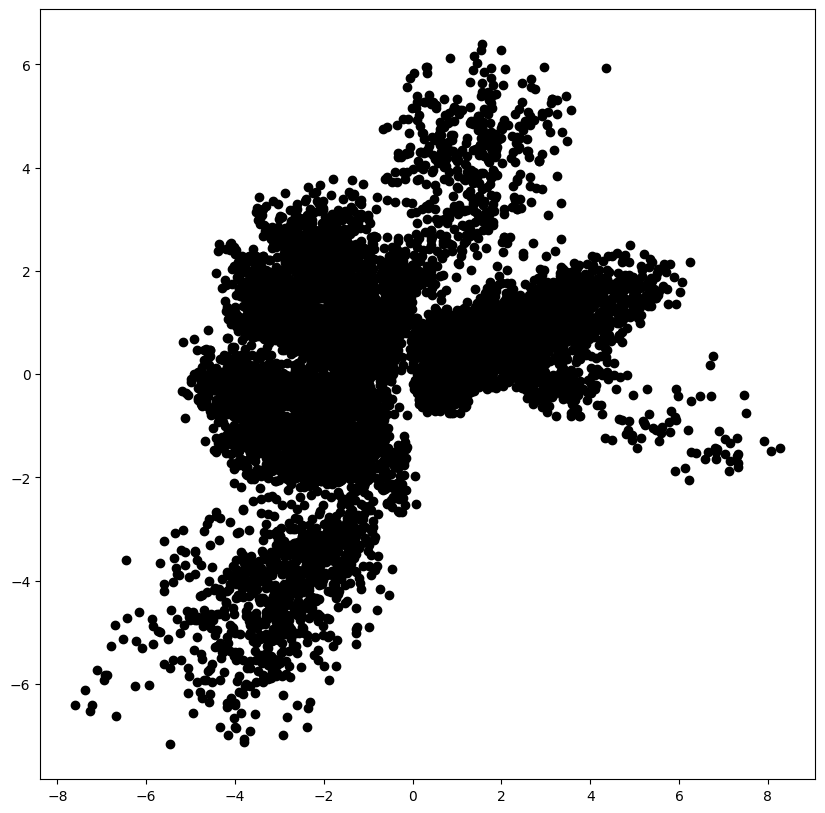

In [31]:
embeddings = encoder.predict(x_test)
print(embeddings)
plt.figure(figsize=(10, 10))
plt.scatter(embeddings[:, 0], embeddings[: , 1], c="black")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


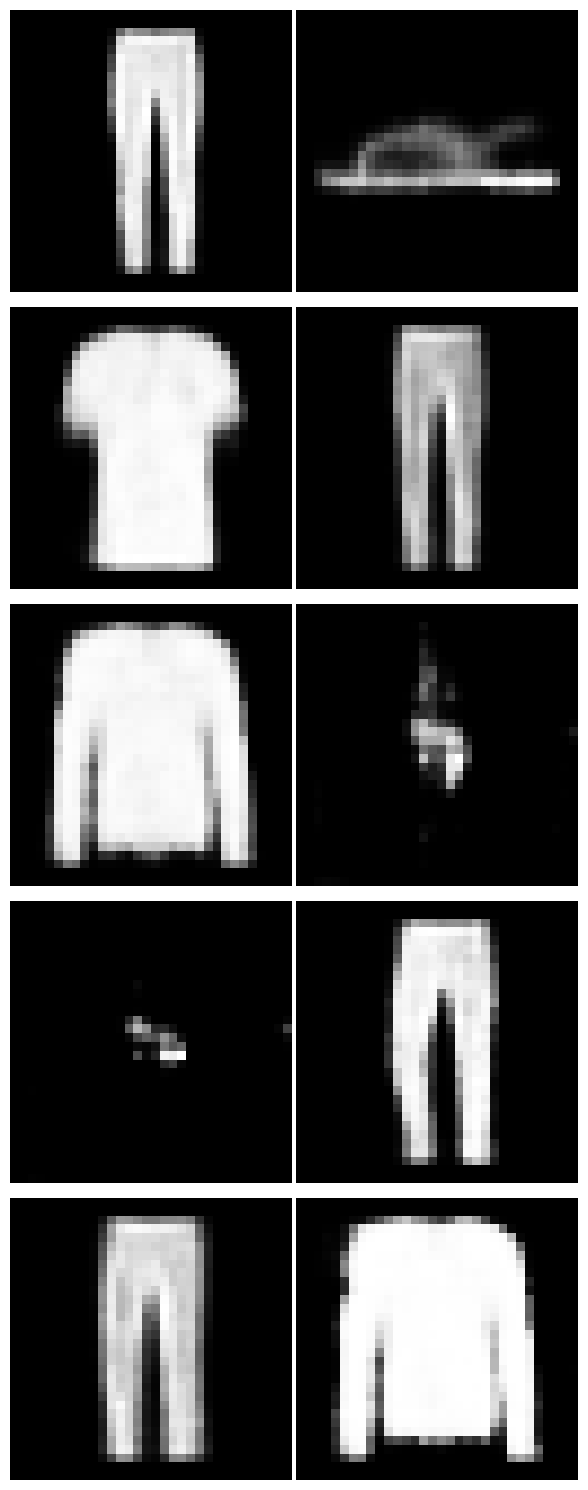

In [46]:
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)
sample = np.random.uniform(mins, maxs, size=(10, 2))

generateds = decoder.predict(sample)

# 5x2 서브플롯 생성
fig, axes = plt.subplots(5, 2, figsize=(6, 15))  # 5행 2열의 서브플롯

# 이미지를 서브플롯에 배치
for i in range(5):
    for j in range(2):
        index = i * 2 + j  # 현재 이미지를 결정
        ax = axes[i, j]
        ax.imshow(generateds[index].reshape(32, 32), cmap='gray')  # 1채널 이미지를 흑백으로 표시
        ax.axis('off')  # 축 숨기기

plt.tight_layout()  # 서브플롯 간의 간격 조정
plt.show()  # 이미지를 시각화

# 오토인코더의 문제 세가지
1. 의류영역의 샘플이 모여 있지 않은 공백 공간에서 샘플을 가지고 오게 될 수도 있다. 그 결과 적절하지 않은 나올 수 있다.
2. 랜덤 포인트를 선택하는 기준이 없다
3. 공간이 연속적이지 않기 확인 하지 않기 때문에 (1.0, 1.0)이 샌들이라도 (1.1, 1.1)이 만족스러운 샌들 이미지일지 아닐지 보장할 수 없다.